<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_using_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


import numpy as np
import datetime

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
VN30_df = pd.read_csv('./data/VN30.csv', index_col=0, parse_dates=True)

In [4]:
VN30_df.count()

Price       3244
Open        3244
High        3244
Low         3244
Vol.        2635
Change %    3244
dtype: int64

In [5]:
VN30_df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-04,550.43,550.43,550.43,550.43,NaN,4.65%
2010-01-05,566.65,566.65,566.65,566.65,NaN,2.95%
2010-01-06,565.41,565.41,565.41,565.41,NaN,-0.22%
2010-01-07,560.61,560.61,560.61,560.61,NaN,-0.85%
2010-01-08,547.50,547.50,547.50,547.50,NaN,-2.34%


In [6]:
VN30_df.tail(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-26,987.77,"1,032.42","1,033.17",987.77,175.23K,-4.48%
2022-12-27,"1,007.36",988.87,"1,015.01",985.67,153.66K,1.98%
2022-12-28,"1,013.95","1,009.19","1,023.24",997.12,123.26K,0.65%
2022-12-29,"1,008.30","1,013.95","1,022.15","1,008.30",121.03K,-0.56%
2022-12-30,"1,005.19","1,016.71","1,017.45","1,005.19",95.62K,-0.31%


In [7]:
VN30_df.isna().sum()

Price         0
Open          0
High          0
Low           0
Vol.        609
Change %      0
dtype: int64

In [8]:
VN30_df.dropna(inplace=True)

In [9]:
VN30_df.count()

Price       2635
Open        2635
High        2635
Low         2635
Vol.        2635
Change %    2635
dtype: int64

In [10]:
VN30_df = VN30_df.replace(',','', regex=True)
VN30_df = VN30_df.replace('%','', regex=True)
VN30_df = VN30_df.replace('K','', regex=True)
VN30_df = VN30_df.replace('k','', regex=True)
VN30_df = VN30_df.replace('M','', regex=True)
VN30_df = VN30_df.replace('m','', regex=True)


In [11]:
for col in VN30_df.columns:
    VN30_df[col] = VN30_df[col].astype(np.float32)

In [12]:
VN30_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-18,510.809998,509.619995,514.549988,508.640015,22.570000,0.57
2012-06-19,506.670013,508.369995,510.600006,505.019989,12.690000,-0.81
2012-06-20,508.230011,507.230011,510.369995,504.019989,10.660000,0.31
2012-06-21,504.709991,504.850006,507.839996,504.519989,13.240000,-0.69
2012-06-22,500.339996,503.970001,504.209991,499.399994,17.350000,-0.87
...,...,...,...,...,...,...
2022-12-26,987.770020,1032.420044,1033.170044,987.770020,175.229996,-4.48
2022-12-27,1007.359985,988.869995,1015.010010,985.669983,153.660004,1.98
2022-12-28,1013.950012,1009.190002,1023.239990,997.119995,123.260002,0.65


In [14]:
VN30_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

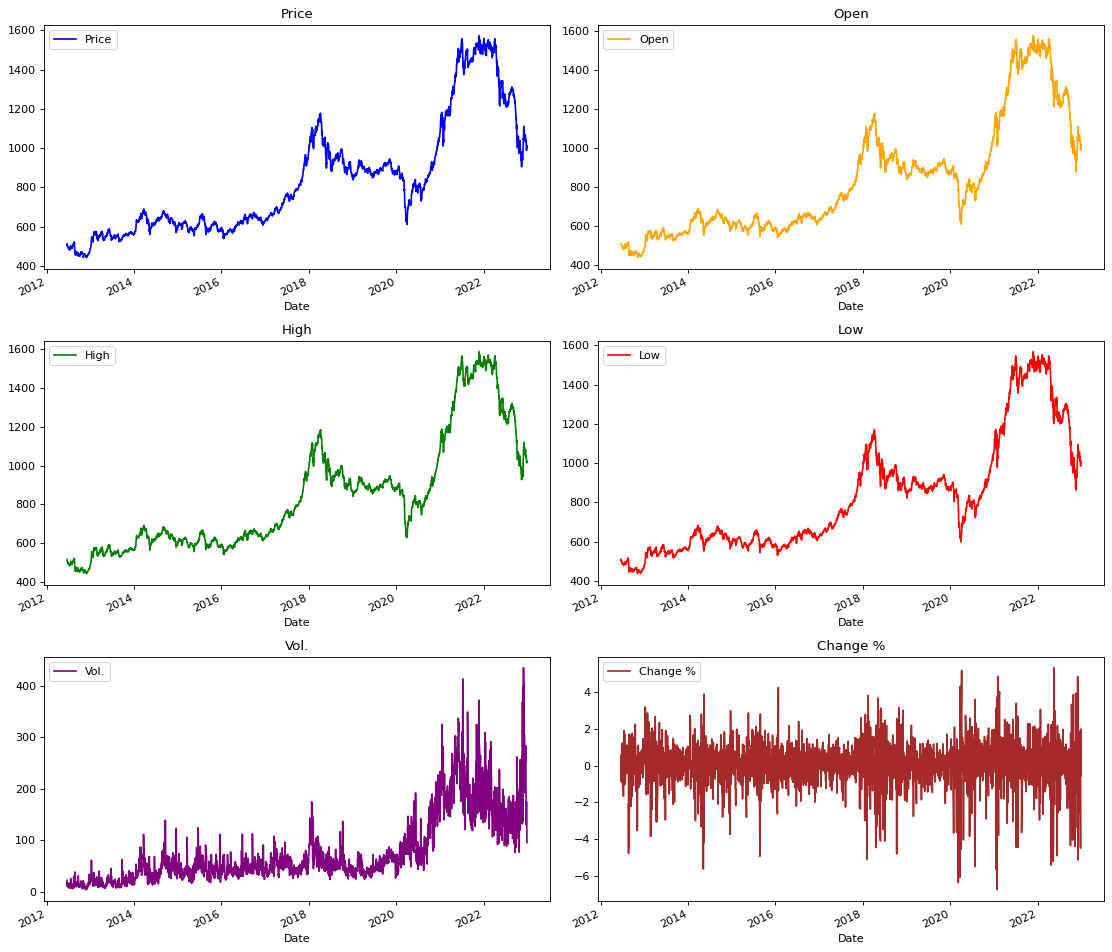

In [17]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(data.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    # print('feature size ', feature_size)
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        # print(i//2, i%2)
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(VN30_df)

In [19]:
VN30_df.index

DatetimeIndex(['2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21',
               '2012-06-22', '2012-06-25', '2012-06-26', '2012-06-27',
               '2012-06-28', '2012-06-29',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2635, freq=None)

<Axes: xlabel='Date'>

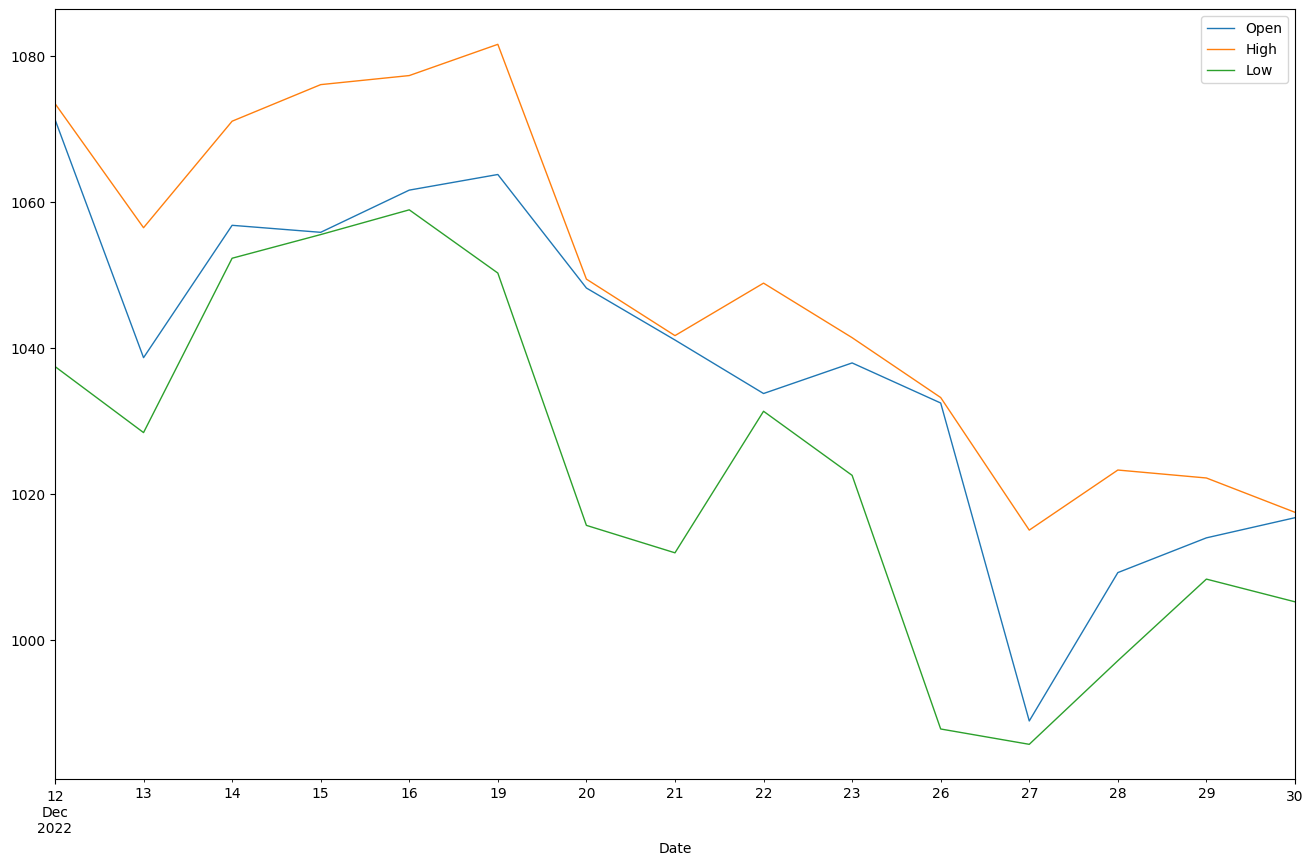

In [28]:
VN30_df[['Open','High','Low']][-15:].plot(figsize=(16, 10), linewidth=1)

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [29]:
def check_stationary(df):
  for i in range(len(df.columns)):
    print(f'============Testing stationary for {df.columns[i]} series ==========')
    result = adfuller(df[df.columns[i]], autolag="AIC")
    print('ADF Statistic: %d' % result[0])
    print('p-value: %f' % result[1])
    print('number of lag %f' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
    
    print(result[1])
    if result[1] > 0.05 :
      print('===> {} - Series is not Stationary'.format(df.columns[i]))
    else:
      print('{} - Series is Stationary'.format(df.columns[i]))

In [35]:
copy_df = VN30_df.copy()

In [37]:
origin_df = VN30_df.copy()

In [38]:
for i in range(len(copy_df.columns)):
    result = adfuller(copy_df[copy_df.columns[i]])
    if result[1] > 0.05 :
        copy_df[copy_df.columns[i]] = copy_df[copy_df.columns[i]] - copy_df[copy_df.columns[i]].shift(1)
            # copy_df.fillna(method='ffill', inplace=True)
copy_df.dropna(inplace=True)

In [39]:
copy_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-19,-4.139984,-1.250000,-3.949982,-3.620026,-9.880000,-0.81
2012-06-20,1.559998,-1.139984,-0.230011,-1.000000,-2.030000,0.31
2012-06-21,-3.520020,-2.380005,-2.529999,0.500000,2.580000,-0.69
2012-06-22,-4.369995,-0.880005,-3.630005,-5.119995,4.110001,-0.87
2012-06-25,-2.250000,-4.600006,-0.630005,-2.970001,-0.910000,-0.45
...,...,...,...,...,...,...
2022-12-26,-46.359985,-5.489990,-8.199951,-34.739990,45.379990,-4.48
2022-12-27,19.589966,-43.550049,-18.160034,-2.100037,-21.569992,1.98
2022-12-28,6.590027,20.320007,8.229980,11.450012,-30.400002,0.65


In [40]:
check_stationary(copy_df)

============Testing stationary for Price series ==========
ADF Statistic: -50
p-value: 0.000000
number of lag 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
0.0
Price - Series is Stationary
============Testing stationary for Open series ==========
ADF Statistic: -13
p-value: 0.000000
number of lag 12.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
8.311100831158614e-26
Open - Series is Stationary
============Testing stationary for High series ==========
ADF Statistic: -31
p-value: 0.000000
number of lag 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
0.0
High - Series is Stationary
============Testing stationary for Low series ==========
ADF Statistic: -14
p-value: 0.000000
number of lag 12.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
3.6632250695527503e-26
Low - Series is Stationary
============Testing stationary for Vol. series ==========
ADF Statistic: -12
p-value: 0.000000
number of lag 28.000000
Critical Values:
	1%: -3.4

In [41]:
copy_df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-19,-4.139984,-1.250000,-3.949982,-3.620026,-9.880000,-0.81
2012-06-20,1.559998,-1.139984,-0.230011,-1.000000,-2.030000,0.31
2012-06-21,-3.520020,-2.380005,-2.529999,0.500000,2.580000,-0.69
2012-06-22,-4.369995,-0.880005,-3.630005,-5.119995,4.110001,-0.87
2012-06-25,-2.250000,-4.600006,-0.630005,-2.970001,-0.910000,-0.45


In [42]:
df = copy_df

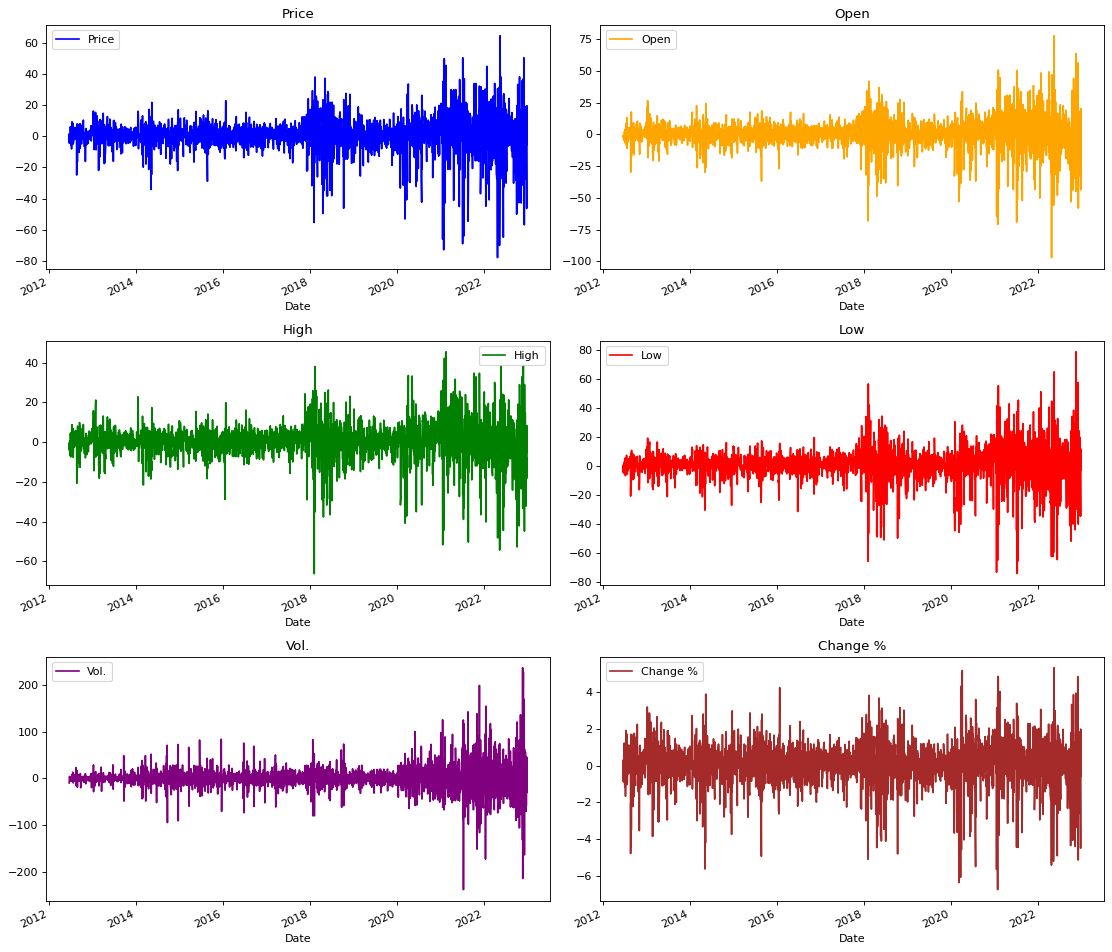

In [43]:
Visualize(df)

 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [46]:
max_lags=12
y='Price'

In [48]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [49]:
for y in df.columns:
    print('Causal test', y)
    for i in range(0,len(df.columns)):
        results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
        p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
        print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Causal test Price
Column - Price : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - Open : P_Values - [0.5561, 0.9512, 0.8293, 0.3163, 0.5749, 0.0545, 0.1228, 0.0438, 0.2651, 0.2226, 0.1788, 0.006]
Column - High : P_Values - [0.1326, 0.0514, 0.0012, 0.0035, 0.0115, 0.0009, 0.0046, 0.0004, 0.0056, 0.0029, 0.0051, 0.0001]
Column - Low : P_Values - [0.4654, 0.0598, 0.0908, 0.1569, 0.2512, 0.2558, 0.0199, 0.0053, 0.0404, 0.0481, 0.0566, 0.0008]
Column - Vol. : P_Values - [0.1045, 0.0223, 0.0426, 0.0288, 0.0611, 0.0538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Change % : P_Values - [0.0424, 0.0175, 0.0169, 0.0016, 0.002, 0.0047, 0.0054, 0.0081, 0.0089, 0.0077, 0.013, 0.0178]
Causal test Open
Column - Price : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Open : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - High : P_Values - [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - 

In [50]:
maxlag=12
test = 'ssr_ftest'
def grangers_causality_matrix(X_train, variables, test = 'ssr_ftest', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.max(p_values)
            dataset.loc[r,c] = str(p_values)
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
grangers_causality_matrix(df, variables = df.columns, test=test)


,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x
Price_y,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.5561, 0.9512, 0.8293, 0.3163, 0.5749, 0.054...","[0.1326, 0.0514, 0.0012, 0.0035, 0.0115, 0.000...","[0.4654, 0.0598, 0.0908, 0.1569, 0.2512, 0.255...","[0.1045, 0.0223, 0.0426, 0.0288, 0.0611, 0.053...","[0.0424, 0.0175, 0.0169, 0.0016, 0.002, 0.0047..."
Open_y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
High_y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Low_y,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.1072, 0.0082, 0.0026, 0.0123, 0.0021, 0.008...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Vol._y,"[0.0002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
Change %_y,"[0.0591, 0.0361, 0.0455, 0.005, 0.0057, 0.0122...","[0.3066, 0.4006, 0.361, 0.1666, 0.0814, 0.0391...","[0.2461, 0.4792, 0.8456, 0.6662, 0.5482, 0.216...","[0.594, 0.0246, 0.0134, 0.0183, 0.0295, 0.0346...","[0.0891, 0.073, 0.1817, 0.0946, 0.144, 0.104, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [52]:
max_lags = 12
y = 'Price'
for i in range(0,len(df.columns)):
  results=grangercausalitytests(df[[y,df.columns[i]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i],p_values))

Column - Price : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Column - Open : P_Values - [0.5561, 0.9512, 0.8293, 0.3163, 0.5749, 0.0545, 0.1228, 0.0438, 0.2651, 0.2226, 0.1788, 0.006]
Column - High : P_Values - [0.1326, 0.0514, 0.0012, 0.0035, 0.0115, 0.0009, 0.0046, 0.0004, 0.0056, 0.0029, 0.0051, 0.0001]
Column - Low : P_Values - [0.4654, 0.0598, 0.0908, 0.1569, 0.2512, 0.2558, 0.0199, 0.0053, 0.0404, 0.0481, 0.0566, 0.0008]
Column - Vol. : P_Values - [0.1045, 0.0223, 0.0426, 0.0288, 0.0611, 0.0538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Change % : P_Values - [0.0424, 0.0175, 0.0169, 0.0016, 0.002, 0.0047, 0.0054, 0.0081, 0.0089, 0.0077, 0.013, 0.0178]


In [53]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-06-19,-4.139984,-1.250000,-3.949982,-3.620026,-9.880000,-0.81
2012-06-20,1.559998,-1.139984,-0.230011,-1.000000,-2.030000,0.31
2012-06-21,-3.520020,-2.380005,-2.529999,0.500000,2.580000,-0.69
2012-06-22,-4.369995,-0.880005,-3.630005,-5.119995,4.110001,-0.87
2012-06-25,-2.250000,-4.600006,-0.630005,-2.970001,-0.910000,-0.45
...,...,...,...,...,...,...
2022-12-26,-46.359985,-5.489990,-8.199951,-34.739990,45.379990,-4.48
2022-12-27,19.589966,-43.550049,-18.160034,-2.100037,-21.569992,1.98
2022-12-28,6.590027,20.320007,8.229980,11.450012,-30.400002,0.65


In [54]:
origin_df = origin_df[df.columns]
nobs = 6
df_train = origin_df[:-nobs]
df_test = origin_df[-nobs:]

nobs = len(df_test)

print(df_train.shape) 
print(df_test.shape)

(2629, 6)
(6, 6)


In [56]:
model = VAR(df)


/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [57]:
model.select_order(20).summary()

,AIC,BIC,FPE,HQIC
0,20.69,20.70,9.650e+08,20.69
1,17.78,17.87,5.269e+07,17.81
2,17.28,17.46,3.209e+07,17.35
3,17.06,17.32,2.568e+07,17.15
4,16.87,17.20,2.111e+07,16.99
5,16.76,17.18*,1.904e+07,16.91
6,16.71,17.21,1.811e+07,16.89
7,16.63,17.21,1.663e+07,16.84
8,16.57,17.23,1.572e+07,16.81*
9,16.54,17.28,1.530e+07,16.81


In [58]:
model = VAR(df)
fitted_model = model.fit(maxlags=20, ic='aic')

/home/noing/anaconda3/envs/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Apr, 2023
Time:                     06:34:15
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    17.9786
Nobs:                     2615.00    HQIC:                   16.9910
Log likelihood:          -43055.4    FPE:                1.36653e+07
AIC:                      16.4300    Det(Omega_mle):     1.05554e+07
--------------------------------------------------------------------
Results for equation Price
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.152013         0.220421            0.690           0.490
L1.Price            -0.190858         0.076445           -2.497           0.013
L1.Open             -0.130983         0.087724           -1.493 

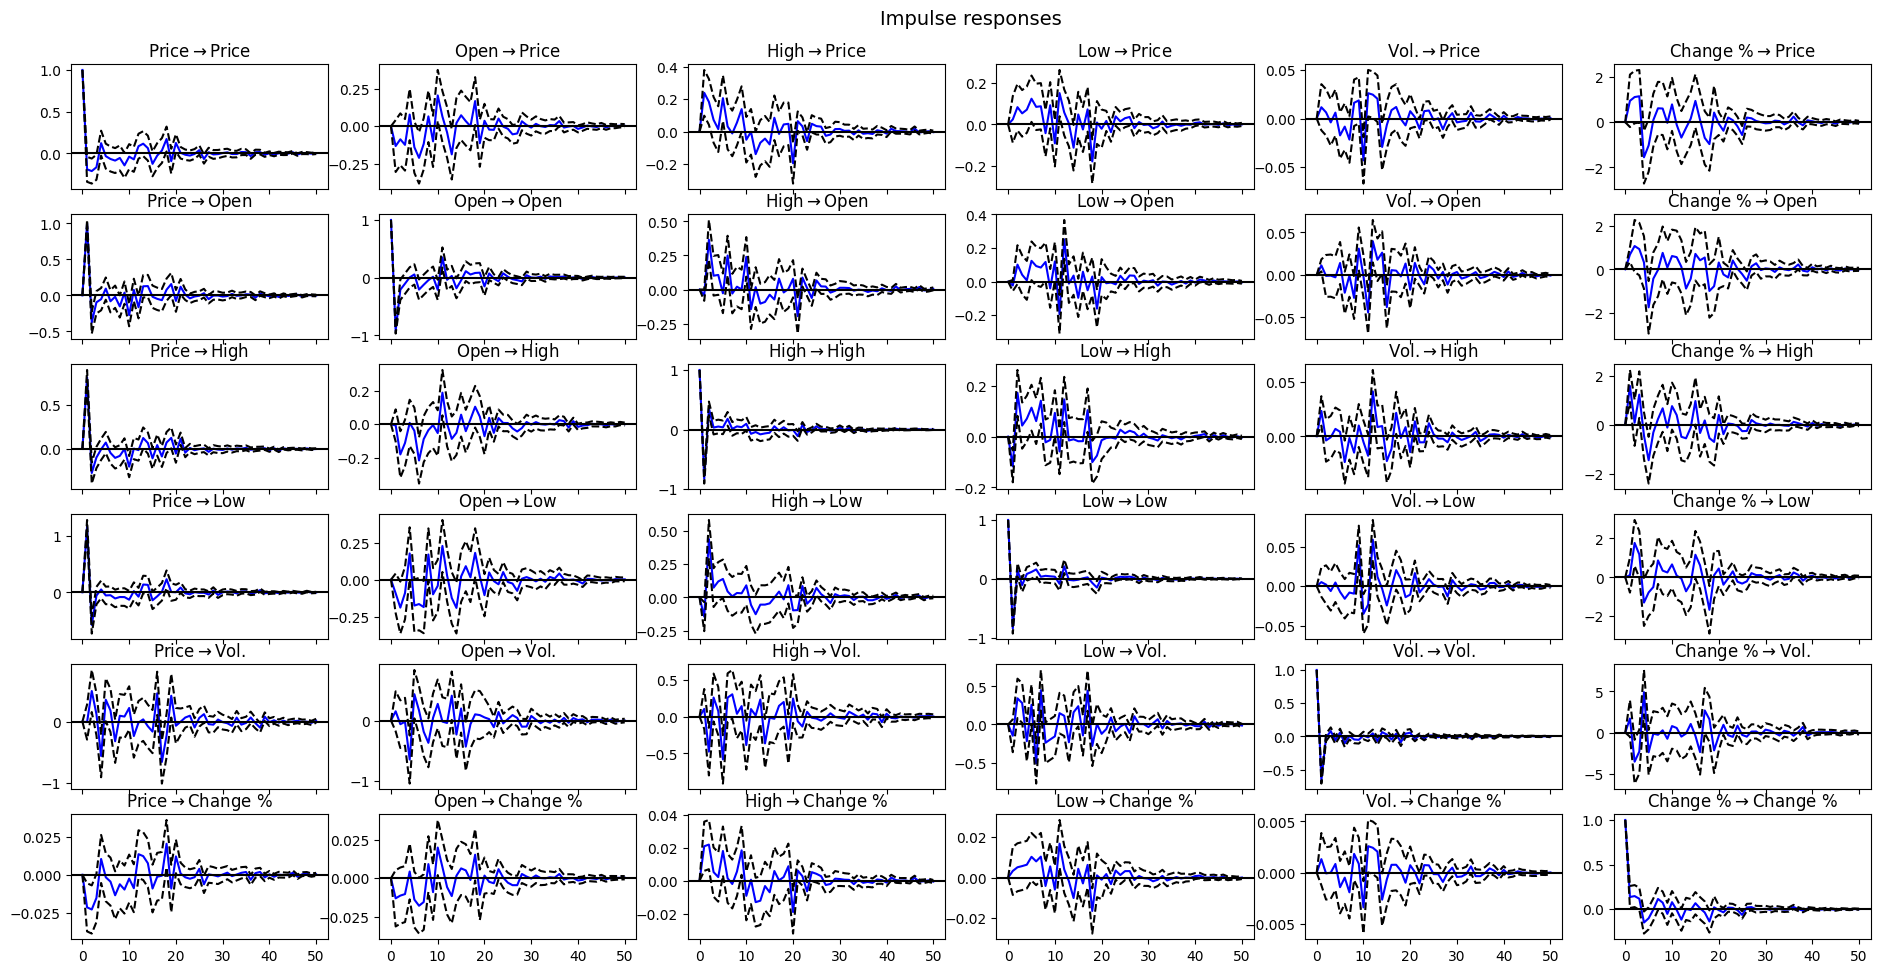

In [60]:
irf = fitted_model.irf(50)
irf.plot(figsize=(20,10))
plt.show()


In [61]:
def adjust(val, length= 6): return str(val).ljust(length)

Kiểm nghiệm Durbin Watson cho việc kiểm định tính tương quan chuỗi cho phần dư của mô hình 

In [62]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(fitted_model.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Price  : 2.01
Open   : 2.0
High   : 2.0
Low    : 2.01
Vol.   : 1.99
Change % : 2.01


In [64]:
lag_order = fitted_model.k_ar
print(lag_order) 


19


In [65]:
import random
nobs = lag_order
# start_index = random.randint(lag_order+1, len(origin_df) - nobs-1)
start_index = len(origin_df) - lag_order
df_train = origin_df[:start_index]
df_test = origin_df[start_index:start_index+nobs]

nobs = len(df_test)

# Check size
print(df_train.shape) 
print(df_test.shape)

(2616, 6)
(19, 6)


In [66]:
# lag_order = fitted_model.k_ar
# print(lag_order)  #> 5

# Input data for forecasting
# forecast_input = df.values[-lag_order:]
forecast_input = df.values[(start_index - lag_order - 1):start_index - 1]
forecast_input

array([[-4.1003418e-01,  2.3039978e+01,  1.1770020e+01,  1.8380005e+01,
        -1.9290009e+01, -3.9999999e-02],
       [-4.2880005e+01, -1.1130005e+01, -2.3490051e+01, -4.4169983e+01,
         8.6110001e+01, -4.3800001e+00],
       [ 1.2059998e+01, -2.3109985e+01, -6.2399902e+00,  1.6820007e+01,
        -3.9099991e+01,  1.2900000e+00],
       [-1.2549988e+01, -7.1002197e-01, -1.7580017e+01, -2.8340027e+01,
        -1.5200043e+00, -1.3200001e+00],
       [-3.1539978e+01, -2.2769958e+01, -1.8599976e+01, -2.0010010e+01,
         6.1300049e+00, -3.3699999e+00],
       [ 3.5519958e+01, -4.4960022e+01,  1.5190002e+01, -3.0179993e+01,
         3.1849991e+01,  3.9300001e+00],
       [ 3.0750000e+01,  6.3530029e+01,  3.2859985e+01,  7.8460022e+01,
        -6.5259995e+01,  3.2700000e+00],
       [ 1.6003418e-01,  2.6049988e+01,  1.7700195e+00, -5.9002686e-01,
         7.9399994e+01,  2.0000000e-02],
       [-1.4309998e+01,  2.8200073e+00, -5.0399780e+00,  1.0440002e+01,
        -1.3200000e+02, 

In [67]:
df[(start_index - lag_order-1):start_index-1]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-11-09,-0.410034,23.039978,11.770020,18.380005,-19.290009,-0.04
2022-11-10,-42.880005,-11.130005,-23.490051,-44.169983,86.110001,-4.38
2022-11-11,12.059998,-23.109985,-6.239990,16.820007,-39.099991,1.29
2022-11-14,-12.549988,-0.710022,-17.580017,-28.340027,-1.520004,-1.32
2022-11-15,-31.539978,-22.769958,-18.599976,-20.010010,6.130005,-3.37
2022-11-16,35.519958,-44.960022,15.190002,-30.179993,31.849991,3.93
2022-11-17,30.750000,63.530029,32.859985,78.460022,-65.259995,3.27
2022-11-18,0.160034,26.049988,1.770020,-0.590027,79.399994,0.02
2022-11-21,-14.309998,2.820007,-5.039978,10.440002,-132.000000,-1.47


In [68]:
df_test

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-06,1054.060059,1109.500000,1109.500000,1054.060059,405.649994,-5.12
2022-12-07,1047.579956,1051.550049,1064.729980,1037.150024,242.089996,-0.61
2022-12-08,1062.729980,1061.989990,1093.640015,1055.630005,304.559998,1.45
2022-12-09,1065.079956,1069.380005,1076.670044,1051.619995,236.860001,0.22
2022-12-12,1037.420044,1071.270020,1073.439941,1037.420044,219.919998,-2.60
2022-12-13,1056.430054,1038.630005,1056.430054,1028.369995,241.919998,1.83
2022-12-14,1056.170044,1056.760010,1071.020020,1052.250000,192.529999,-0.02
2022-12-15,1068.079956,1055.800049,1076.030029,1055.489990,248.619995,1.13
2022-12-16,1064.069946,1061.579956,1077.270020,1058.880005,249.610001,-0.38


In [69]:
len(df_test)

19

In [70]:
fc = fitted_model.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index, columns=df.columns + '_1d')
df_forecast

,Price_1d,Open_1d,High_1d,Low_1d,Vol._1d,Change %_1d
Date,,,,,,
2022-12-06,-4.899148,13.173003,5.393017,-7.210642,-16.898832,-0.051738
2022-12-07,-2.766582,-2.120930,-6.347350,-1.327823,-48.724527,-0.183039
2022-12-08,0.323181,0.815811,7.856810,0.553308,42.104006,0.233644
2022-12-09,5.389440,-2.054208,-9.609939,1.854262,-54.924414,0.391662
2022-12-12,-8.904888,7.792358,6.455862,-3.900820,14.797732,-0.842498
2022-12-13,2.215715,-15.786647,-8.171332,-6.256105,-9.546808,0.337836
2022-12-14,15.483642,9.122853,9.810613,17.898904,9.200232,1.448257
2022-12-15,0.813285,14.998565,13.072552,5.929913,15.588274,0.281227
2022-12-16,3.054795,-4.986830,-2.562719,-1.429611,-10.481889,0.397066


In [71]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [73]:
df_train['Price'].iloc[-1]

1110.94

In [74]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
# df_results.loc[:, [ 'Exchange Rate_forecast', 'Gold price_forecast', 'S&P500_forecast', 'VN Index_forecast', 'Oil price_forecast']]'
df_results

,Price_1d,Open_1d,High_1d,Low_1d,Vol._1d,Change %_1d,Price_forecast,Open_forecast,High_forecast,Low_forecast,Vol._forecast,Change %_forecast
Date,,,,,,,,,,,,
2022-12-06,-4.899148,13.173003,5.393017,-7.210642,-16.898832,-0.051738,1106.040793,1107.563018,1125.953076,1087.179373,358.171175,1.588262
2022-12-07,-2.766582,-2.120930,-6.347350,-1.327823,-48.724527,-0.183039,1103.274211,1105.442088,1119.605726,1085.851550,309.446649,1.405223
2022-12-08,0.323181,0.815811,7.856810,0.553308,42.104006,0.233644,1103.597393,1106.257899,1127.462535,1086.404858,351.550654,1.638868
2022-12-09,5.389440,-2.054208,-9.609939,1.854262,-54.924414,0.391662,1108.986832,1104.203691,1117.852597,1088.259120,296.626240,2.030530
2022-12-12,-8.904888,7.792358,6.455862,-3.900820,14.797732,-0.842498,1100.081944,1111.996049,1124.308459,1084.358300,311.423972,1.188031
2022-12-13,2.215715,-15.786647,-8.171332,-6.256105,-9.546808,0.337836,1102.297659,1096.209403,1116.137127,1078.102195,301.877164,1.525867
2022-12-14,15.483642,9.122853,9.810613,17.898904,9.200232,1.448257,1117.781301,1105.332255,1125.947740,1096.001099,311.077396,2.974124
2022-12-15,0.813285,14.998565,13.072552,5.929913,15.588274,0.281227,1118.594585,1120.330821,1139.020292,1101.931013,326.665670,3.255351
2022-12-16,3.054795,-4.986830,-2.562719,-1.429611,-10.481889,0.397066,1121.649380,1115.343991,1136.457573,1100.501401,316.183781,3.652417


In [75]:
df_test

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-06,1054.060059,1109.500000,1109.500000,1054.060059,405.649994,-5.12
2022-12-07,1047.579956,1051.550049,1064.729980,1037.150024,242.089996,-0.61
2022-12-08,1062.729980,1061.989990,1093.640015,1055.630005,304.559998,1.45
2022-12-09,1065.079956,1069.380005,1076.670044,1051.619995,236.860001,0.22
2022-12-12,1037.420044,1071.270020,1073.439941,1037.420044,219.919998,-2.60
2022-12-13,1056.430054,1038.630005,1056.430054,1028.369995,241.919998,1.83
2022-12-14,1056.170044,1056.760010,1071.020020,1052.250000,192.529999,-0.02
2022-12-15,1068.079956,1055.800049,1076.030029,1055.489990,248.619995,1.13
2022-12-16,1064.069946,1061.579956,1077.270020,1058.880005,249.610001,-0.38


In [76]:
df_test_1 = df_test.copy()

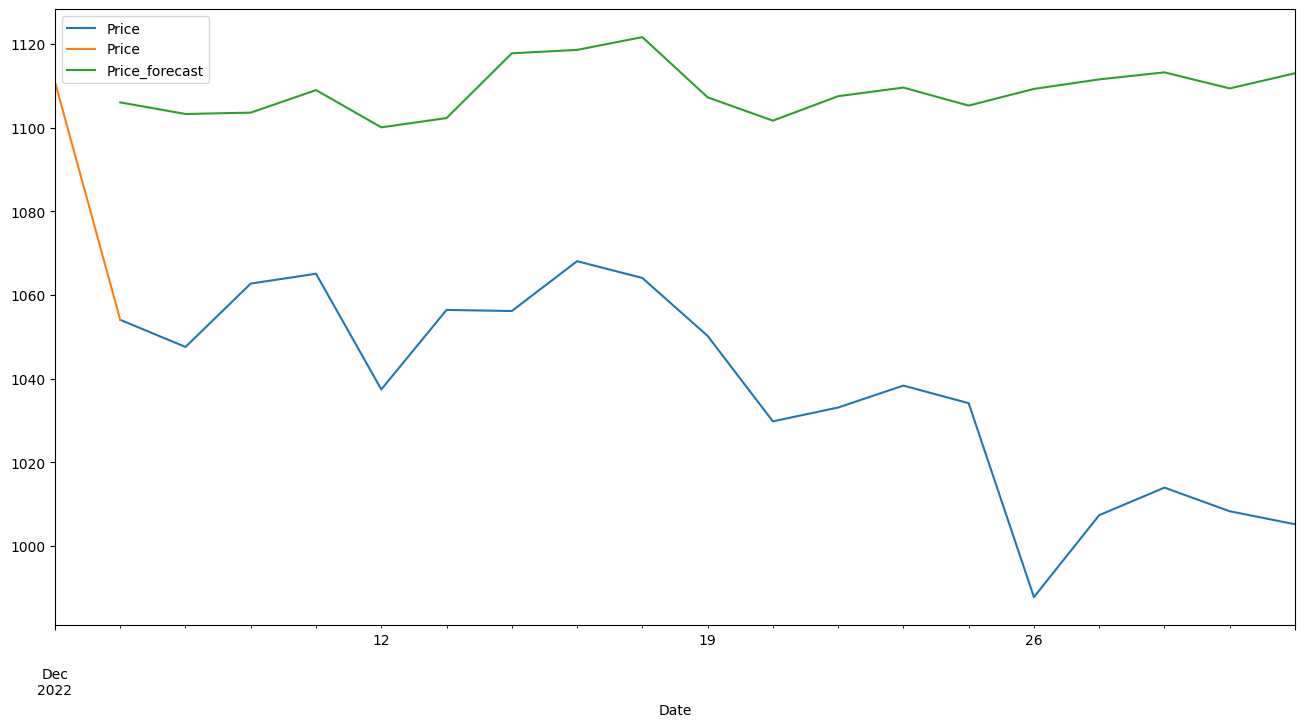

In [78]:
col = 'Price'
df_test['Price'][-nobs:].plot(legend=True)
origin_df['Price'][start_index-1:start_index+1].plot(legend=True)

df_results[col+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

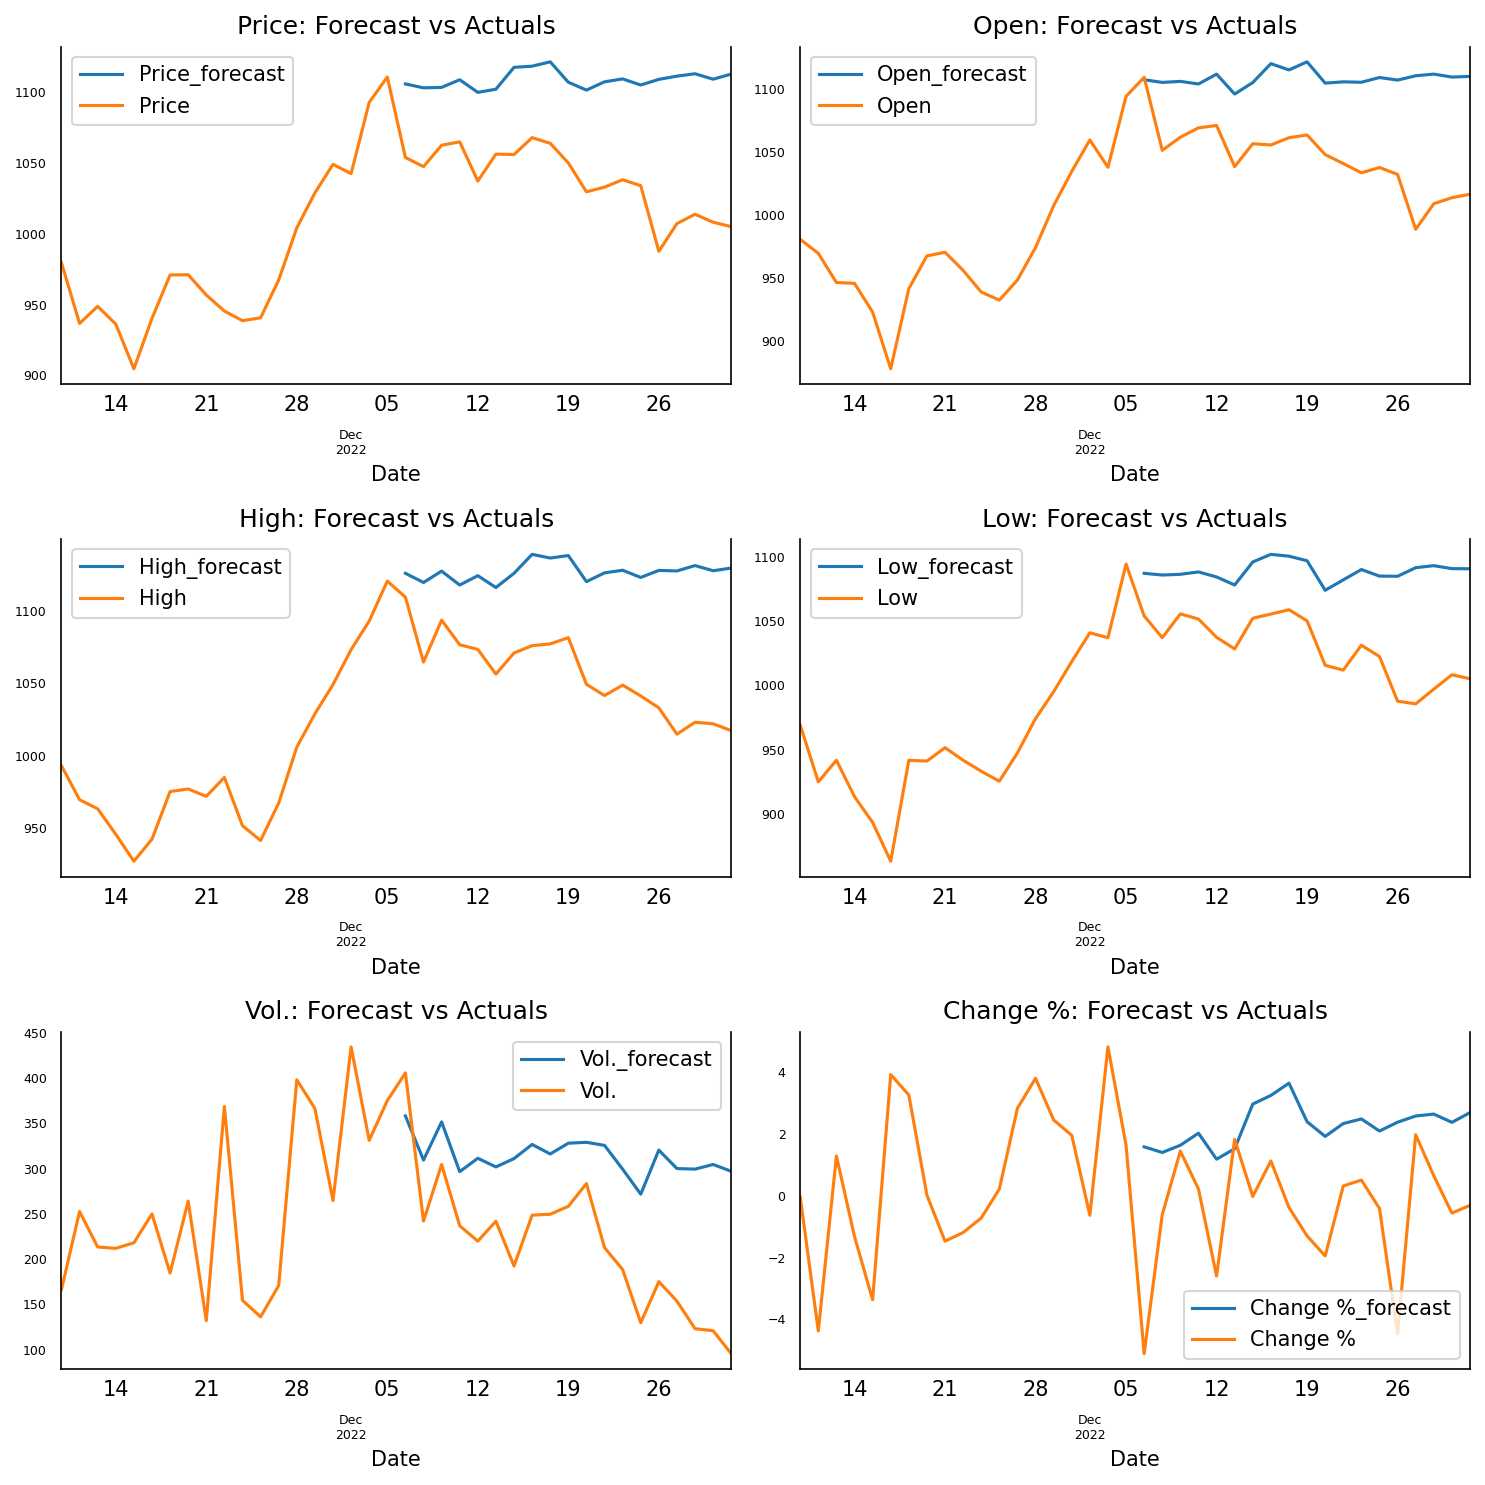

In [79]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    # df_test[col][-nobs:].plot(legend=True, ax=ax)
    origin_df[col][start_index-lag_order:start_index+nobs].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [80]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})



In [82]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(df_results['Price_forecast'].values, df_test['Price'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: VN Index
mape   :  0.069
me     :  71.0681
mae    :  71.0681
mpe    :  0.069
rmse   :  74.8713
corr   :  0.058
minmax :  0.0641


/tmp/ipykernel_6794/2139281694.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/tmp/ipykernel_6794/2139281694.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [83]:
for col in VN30_df.columns:
    print(f'\nForecast Accuracy of: {col}')
    accuracy_prod = forecast_accuracy(df_results[f'{col}_forecast'].values, df_test[col])
    for k, v in accuracy_prod.items():
        print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: Price
mape   :  0.069
me     :  71.0681
mae    :  71.0681
mpe    :  0.069
rmse   :  74.8713
corr   :  0.058
minmax :  0.0641

Forecast Accuracy of: Open
mape   :  0.0617
me     :  63.5716
mae    :  63.7755
mpe    :  0.0615
rmse   :  68.998
corr   :  0.0355
minmax :  0.0575

Forecast Accuracy of: High
mape   :  0.0674
me     :  70.5307
mae    :  70.5307
mpe    :  0.0674
rmse   :  75.4418
corr   :  0.0538
minmax :  0.0626

Forecast Accuracy of: Low
mape   :  0.0589
me     :  60.0693
mae    :  60.0693
mpe    :  0.0589
rmse   :  64.1122
corr   :  0.3286
minmax :  0.0552

Forecast Accuracy of: Vol.
mape   :  0.6388
me     :  98.6814
mae    :  103.6792
mpe    :  0.6265
rmse   :  114.4892
corr   :  0.8054
minmax :  0.3365

Forecast Accuracy of: Change %
mape   :  11.4649
me     :  2.783
mae    :  2.815
mpe    :  -8.956
rmse   :  3.3153
corr   :  0.2697
minmax :  1.3372


/tmp/ipykernel_6794/2139281694.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
/tmp/ipykernel_6794/2139281694.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [84]:
df_test

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-12-06,1054.060059,1109.500000,1109.500000,1054.060059,405.649994,-5.12
2022-12-07,1047.579956,1051.550049,1064.729980,1037.150024,242.089996,-0.61
2022-12-08,1062.729980,1061.989990,1093.640015,1055.630005,304.559998,1.45
2022-12-09,1065.079956,1069.380005,1076.670044,1051.619995,236.860001,0.22
2022-12-12,1037.420044,1071.270020,1073.439941,1037.420044,219.919998,-2.60
2022-12-13,1056.430054,1038.630005,1056.430054,1028.369995,241.919998,1.83
2022-12-14,1056.170044,1056.760010,1071.020020,1052.250000,192.529999,-0.02
2022-12-15,1068.079956,1055.800049,1076.030029,1055.489990,248.619995,1.13
2022-12-16,1064.069946,1061.579956,1077.270020,1058.880005,249.610001,-0.38


In [87]:
start_index = 34
pred_df = pd.DataFrame(columns=VN30_df.columns)
for start_index in range(lag_order+1, len(df)-lag_order):
    forecast_input = df.values[(start_index - lag_order-1):start_index-1]


    fc = fitted_model.forecast(y=forecast_input, steps=1)
    df_forecast = pd.DataFrame(fc, index=origin_df[start_index:start_index+1].index, columns=df.columns + '_1d')


    df_results = invert_transformation(origin_df[(start_index - lag_order - 1):start_index], df_forecast, second_diff=False)
    # df_results.loc[:, [ 'Exchange Rate_forecast', 'Gold price_forecast', 'S&P500_forecast', 'VN Index_forecast', 'Oil price_forecast']]'
    # df_results['VN Index'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
    # plt.show()
    pred_df = pd.concat([pred_df, df_results[[col+'_forecast' for col in VN30_df.columns]]])

In [89]:
pred_df.index.min()

Timestamp('2012-07-16 00:00:00')

In [90]:
pred_df.index.max()

Timestamp('2022-12-02 00:00:00')

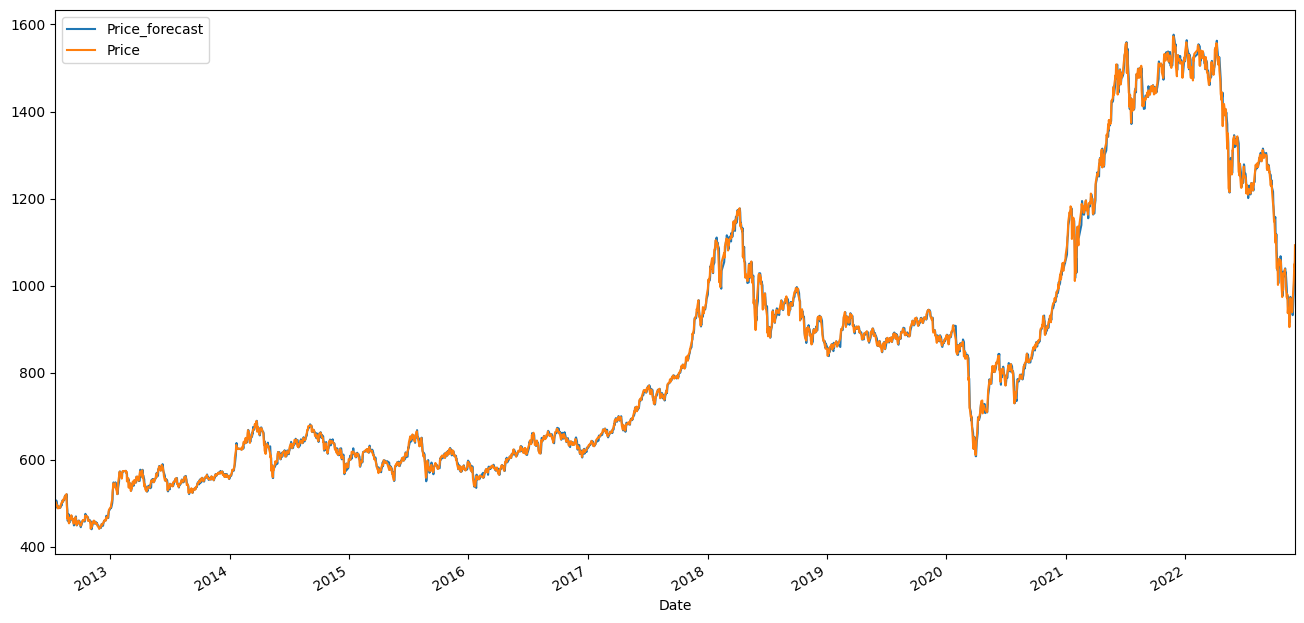

In [94]:
pred_df['2012-07-16':'2022-12-02']['Price'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
origin_df['2012-07-16':'2022-12-02']['Price'].plot(legend=True).autoscale(axis='x',tight=True)
plt.show()

In [95]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(pred_df['Price_forecast'].values, origin_df[lag_order+1: len(df)-lag_order]['Price'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0083
me     :  -0.0454
mae    :  7.0729
mpe    :  0.0
rmse   :  10.7606
corr   :  0.9993
minmax :  0.0082
